<a href="https://colab.research.google.com/github/yzihan/FutureJob/blob/main/Bodypix_for_Body_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing and importing dependencies

In [ ]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 tf_bodypix opencv-python tfjs_graph_converter matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 92.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 74.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
import cv2
import tensorflow as tf
from tf_bodypix.api import load_model, download_model, BodyPixModelPaths
import numpy as np
from matplotlib import pyplot as plt

Loading the bodypix model

In [ ]:
BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16

'https://storage.googleapis.com/tfjs-models/savedmodel/bodypix/mobilenet/float/050/model-stride16.json'

In [ ]:
bp_model = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

Uploading a static image

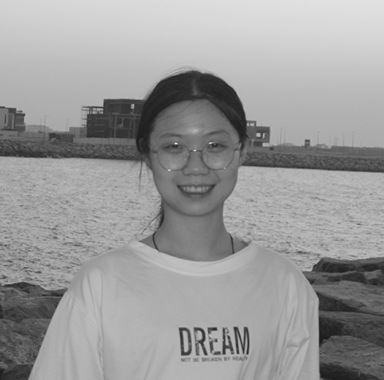

-1

In [ ]:
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/Zihan.JPG")
cv2_imshow(image)
cv2.waitKey(0)

In [ ]:
image.shape

(380, 384, 3)

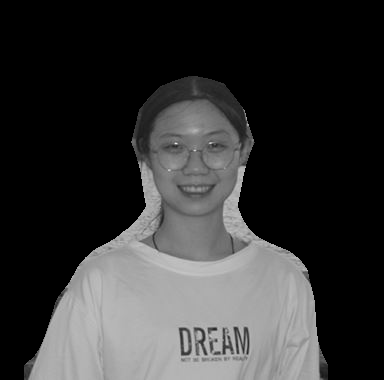

-1

In [ ]:
from google.colab.patches import cv2_imshow

image = cv2.imread("/content/Zihan.JPG")

prediction = bp_model.predict_single(image)
mask = prediction.get_mask(threshold=0.3).numpy().astype(np.uint8)
new_mask = cv2.bitwise_and(image, image, mask=mask)

cv2_imshow(new_mask)
cv2.waitKey(0)

In [ ]:
maskedimg = cv2.imwrite('masked image.png', image)

In [ ]:
def download(path):
  from google.colab import files
  files.download(path)